# Taller Perceptron

Carlos Garavito,  
Juan Sebastián Cortes. 
***


1. Implementación de un perceptron y su regla de aprendizaje. El perceptron debe aceptar como entrada un vector de longittud arbitraria, i.e. el número de caracteristicas (regresores) puede ser arbitrario.

2. Implementación de un adaline con su regla de aprendizaje. El adaline debe aceptar como entrada un vector de longitud arbitraria, i.e. el número de caracteristicas (regresores) puede ser arbitrario.

3. Implemente un perceptrón y un adaline que pueda realizar las operaciones logicas AND, OR, XOR y XNOR.

4. Al implementar la AND y la OR, si compara los pesos con lso datos de la clase $1$ (cuya salida es $1$, ¿Qué puede concluir?

5. Solucione el problema de las flores de iris utilizando un perceptrón y un adaline. Utilice solamente dos clases. Compare las respuestas.


## Implementación de un perceptron

<center><img src="images/perceptron.png" width="400"></center>

Se ha visto que el perceptron puede ser descrito como se muestra en la figura, y que matematicamente es de la forma

$$z = \boldsymbol\omega^{\text{T}}\mathbf{x},$$ 

tal que, 

$$
\begin{equation}
  y = \varphi(z)=
    \begin{cases}
      1 & \text{if} & z \geq \theta,\\
      -1 & \text{if} & z < \theta.
    \end{cases}       
\end{equation}$$

Además, se ha definido que la regla de aprendizaje se muestra en dos pasos:

1. Inicializar los pesos $\omega$ a 0 o a números aleatorios pequeños.
2. Para cada dato de entrenamiento $\mathbf{x}^{(i)}$ realizar los siguientes pasos:
    * actualizar le valor de la predicción, $\hat{y}$,
    * Actualizar los pesos.

Esto es, 

$$\boldsymbol\omega := \boldsymbol\omega+\Delta\boldsymbol\omega,$$

$$\Delta\boldsymbol\omega = \eta\mathbf{X}^{\text{T}}(\mathbf{y}-\hat{\mathbf{y}}),$$

donde $\omega$ es el vector de pesos; $\eta$ es la constante de aprendizaje; $\mathbf{X}$ es una matrix de dimensiones $m\times N$, donde $m$ es el número de observaciones, y $N$ el número de entradas (regresores, cvaracteristicas, etc).

Así, en python se tiene:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se cargan algunos datos de prueba:

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

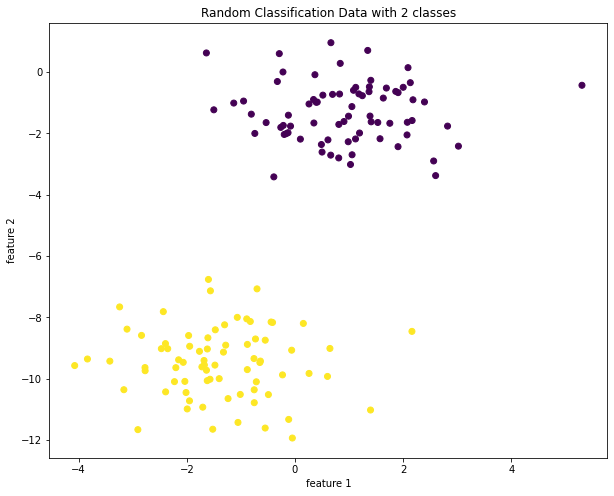

In [2]:
# datos de ejemplo 
# tomado de https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

from sklearn import datasets

X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
                           
y = np.where(y == 0, 1, -1)
                           
#Plotting              
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],X[:, 1], c = y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Se define la clase `my_perceptron`, con los siguientes métodos: 

* `__init__`: inicializa la clase con valores de $\eta$ e iteraciones pre definidas, 
*  `fit`: Ajusta el perceptron a los datos de entrenamiento, 
* `predict`: calcula el valor de salida en función de los datos que recibe, 
* `net_input`: define la función de activación. En nuestro caso, una función escalón desde -1 a 1. 

In [24]:
class my_perceptron: 
    '''
    Clase perceptron basada en las notas de clase de curso de machine learning de la maestria MACC 
    y el tutorial 'programando un perceptron en python' https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

    Parámetros
    ----------
    eta: float
        Tasa de aprendizaje
    
    epoch: int
        Número de iteraciones sobre el conjunto de datos

    Atributos
    ---------
    omega: numpy array 1d
            Vector de pesos

    '''

    def __init__(self, eta = 0.1, epoch = 10):
        self.eta = eta
        self.epoch = epoch

    def fit(self, X, y): 
        '''
        Ajusta los datos de entrenamiento

        Parámetros
        ----------
        X: numpy array, shape := [n_samples, n_features]
            Matriz de datos, donde n_samples es el número de observaciones y n_features es el número de caracteristicas.
        y: numpy array, shape := [n_samples]
            Vector de datos objetivo (target) 

        Returns 
        -------
        Self: objeto
        '''
        self.omega = np.zeros(1 + X.shape[1]) #crea el vector de pesos
        self.actualizaciones = [] 

        # ajusta el vector de pesos para cada epoch
        for _ in range(self.epoch):
            # ajusta el vector de pesos para cada observación
            actualizacion = 0 
            for x_sample, target in zip(X, y):
                update = self.eta * (target - self.predict(x_sample))
                self.omega[1:] += update * x_sample
                self.omega[0] += update
                actualizacion += int(update != 0.0)
            self.actualizaciones.append(actualizacion)
        return self

    def predict(self, X): 
        '''
        Retorna la clase usando la función escalón.
        phi(z) = 1 si z >= theta; -1  si z < theta
        '''
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
    
    def net_input(self, X): 
        z = z = np.dot(X, self.omega[1:]) + self.omega[0]
        return z

Definida la clase, se entrena el perceptron con los datos de ejemplo.

In [6]:
my_classifier = my_perceptron(eta = 0.1, epoch = 10)
my_classifier.fit(X,y)

Text(0.5, 1.0, 'Perceptron Classification Data with 2 classes')

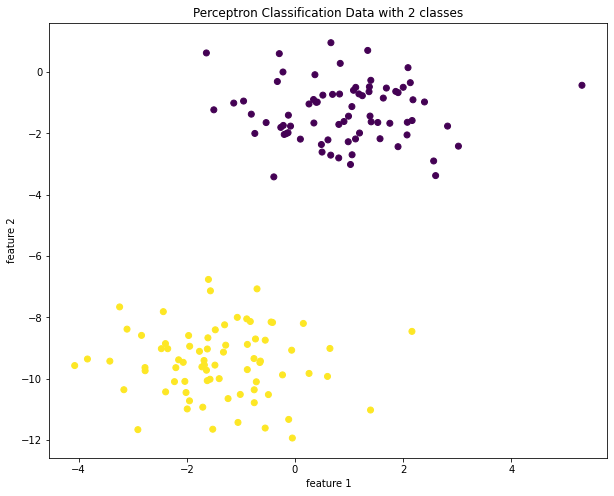

In [7]:
# plot the perceptron classification      
y_pred = my_classifier.predict(X)
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],X[:, 1], c = y_pred)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Classification Data with 2 classes')

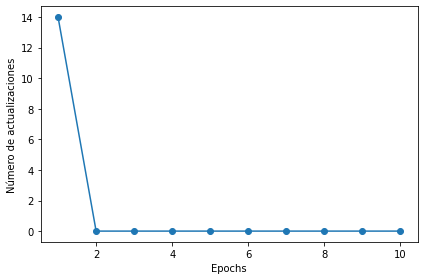

In [8]:
# Cantidad de actualizaciones del vector pesos por cada epoch
plt.plot(range(1, len(my_classifier.actualizaciones) + 1), my_classifier.actualizaciones, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
 
plt.tight_layout()
plt.show()

## Implementación adaline

Tomando en cuenta que 

$$\boldsymbol\omega:=\boldsymbol\omega-\eta\nabla\mathbf{J}(\boldsymbol\omega),$$

donde se puede definir $-\eta\nabla\mathbf{J}(\boldsymbol\omega) = \Delta\boldsymbol\omega $, tal que en forma vectorial resulta

$$\Delta\boldsymbol\omega = \eta\mathbf{X}^{\text{T}}(\mathbf{y}-\mathbf{X}\boldsymbol\omega),$$ 

y sabiendo que $z = \boldsymbol\omega^{\text{T}}\mathbf{x}$, y $\varphi(z) = z$, en python se procede de la siguiente forma:

In [52]:
# This class must be corrected! 
# compare with https://dzone.com/articles/adaline-explained-with-python-example-data-analyti

class my_adaline: 
    '''
    Clase perceptron basada en las notas de clase de curso de machine learning de la maestria MACC y el tutorial 'programando un perceptron en python' https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/

    Parámetros
    ----------
    eta: float
        Tasa de aprendizaje
    
    epoch: int
        Número de iteraciones sobre el conjunto de datos

    Atributos
    ---------
    omega: numpy array 1d
            Vector de pesos

    '''

    def __init__(self, eta = 0.1, epoch = 10):
        self.eta = eta
        self.epoch = epoch

    def fit(self, X, y): 
        '''
        Ajusta los datos de entrenamiento

        Parámetros
        ----------
        X: numpy array, shape := [n_samples, n_features]
            Matriz de datos, donde n_samples es el número de observaciones y n_features es el número de caracteristicas.
        y: numpy array, shape := [n_samples]
            Vector de datos objetivo (target) 

        Returns 
        -------
        Self: objeto
        '''
        self.omega = np.zeros(1 + X.shape[1]) #crea el vector de pesos
        self.cost_= [] 

        # ajusta el vector de pesos para cada epoch
        for _ in range(self.epoch):
            # ajusta el vector de pesos para cada observación
            cost = 0 
            for x_sample, target in zip(X, y):
                output = self.activation_function(x_sample)
                errors = (target - output)
                self.omega [1:] += self.eta * x_sample.T.dot(errors)
                self.omega[0] += self.eta * errors.sum()
                cost = (errors**2).sum() / 2.0
                self.cost_.append(cost)
        return self

    def predict(self, X): 
        '''
        Retorna la clase usando la función escalón.
        phi(z) = 1 si z >= theta; -1  si z < theta
        '''
        phi = np.where(self.activation_function(X) >= 0, 1, -1)
        return phi
    
    def net_input(self, X):
        z = np.dot(X, self.omega[1:]) + self.omega[0]
    
        return z

    def activation_function(self, X):
        return self.net_input(X)



In [13]:
my_classifier = my_adaline(eta = 0.001, epoch = 100)
my_classifier.fit(X,y)

Text(0.5, 1.0, 'Adaline Classification Data with 2 classes')

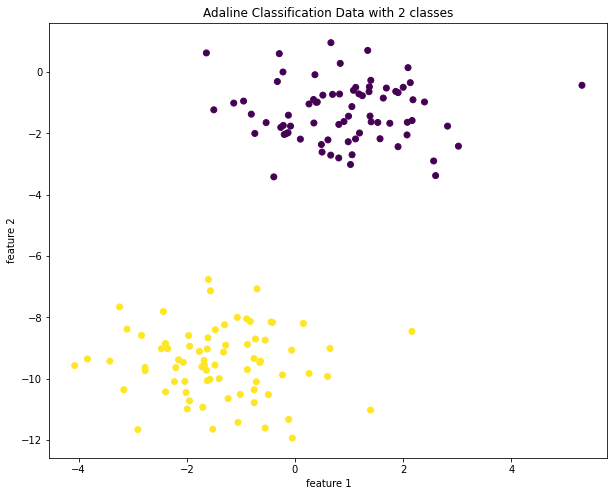

In [14]:
# plot the perceptron classification      
y_pred = my_classifier.predict(X)
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],X[:, 1], c = y_pred)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Adaline Classification Data with 2 classes')

## Implementación perceptrón y adaline: AND, OR, XOR, XNOR

Definiendo las tablas de verdad de las compuertas, mediante arreglos

### Solución con perceptron

#### AND

In [165]:
# AND peceptron
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    -1,
    -1,
    -1,
    1])

my_classifier = my_perceptron(eta=0.1, epoch=10)
my_classifier.fit(X_and, y_and)
my_classifier.predict(X_and)

array([-1, -1, -1,  1])

#### OR

In [166]:
# OR peceptron
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    -1,
    1,
    1,
    1])

my_classifier = my_perceptron(eta=0.1, epoch=100)
my_classifier.fit(X_or, y_or)
my_classifier.predict(X_or)

array([-1,  1,  1,  1])

#### XOR

In [168]:
# XOR peceptron
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_xor =  np.array([
    -1,
    1,
    1,
    -1])

my_classifier = my_perceptron(eta=0.01, epoch=100)
my_classifier.fit(X_xor, y_xor)
my_classifier.predict(X_xor)

array([ 1,  1, -1, -1])

No es posible ajustar el modelo con el perceptron, ya que los datos no son linealmente separables. Esto se puede ver graficamente. 

Text(0.5, 1.0, 'Scattered plot for X_xor data')

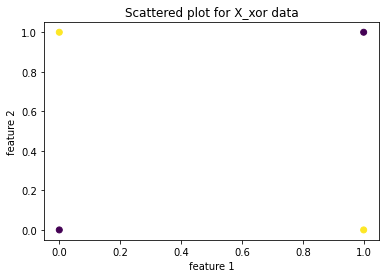

In [187]:
plt.scatter(X_xor[:, 0],X_xor[:, 1], c = y_xor)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Scattered plot for X_xor data')

#### XNOR

In [173]:
# XNOR peceptron
X_xnor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xnor = np.array([
    1,
    0,
    0,
    1])

my_classifier = my_perceptron(eta=0.01, epoch=100)
my_classifier.fit(X_xnor, y_xnor)
my_classifier.predict(X_xnor)

array([1, 1, 1, 1])

No es posible ajustar el modelo con el perceptron, ya que los datos no son linealmente separables. Esto se puede ver graficamente. 

Text(0.5, 1.0, 'Scattered plot for X_xnor data')

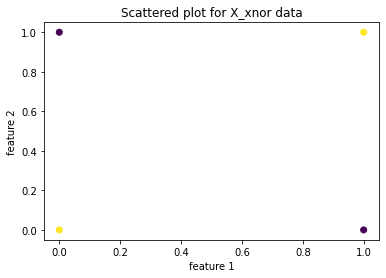

In [188]:
plt.scatter(X_xnor[:, 0],X_xnor[:, 1], c = y_xnor)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Scattered plot for X_xnor data')

### Solucion con adaline

#### AND

In [20]:
# AND adaline
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    -1,
    -1,
    -1,
    1])

ones = np.ones((len(X_and),1))
X_and = np.hstack((X_and, ones))

my_andclassifier = my_adaline(eta=0.001, epoch=100)
my_andclassifier.fit(X_and, y_and)
my_andclassifier.predict(X_and)

array([-1, -1, -1, -1])

#### OR

In [30]:
# OR adaline
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    -1,
    1,
    1,
    1])
    
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_andclassifier = my_adaline(eta=0.001, epoch=1000)
my_andclassifier.fit(X_or, y_or)
my_andclassifier.predict(X_or)

array([-1,  1,  1,  1])

#### XOR

In [183]:
# XOR adaline
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_xor =  np.array([
    -1,
    1,
    1,
    -1])
    
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_andclassifier = my_adaline(eta=0.01, epoch=10)
my_andclassifier.fit(X_or, y_or)
my_andclassifier.predict(X_or)

array([-1,  1,  1,  1])

#### XNOR

In [185]:
# XNOR adaline
X_xnor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xnor = np.array([
    1,
    0,
    0,
    1])

ones = np.ones((len(X_xnor),1))
X_xnor = np.hstack((X_xnor, ones))

my_andclassifier = my_adaline(eta=0.01, epoch=100)
my_andclassifier.fit(X_xnor, y_xnor)
my_andclassifier.predict(X_xnor)

array([1, 1, 1, 1])

En los casos `XOR` y `XNOR` con adaline, ya que los datos no son linealmente separables.

## Al implementar la AND y la OR, si compara los pesos con los datos de la clase $1$ (cuya salida es $1$), ¿Qué puede concluir?

### AND

In [31]:
# AND
X_and = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_and = np.array([
    0,
    0,
    0,
    1])

ones = np.ones((len(X_and),1))
X_and = np.hstack((X_and, ones))

my_classifier = my_perceptron(eta=0.01, epoch=10)
my_classifier.fit(X_and, y_and)

my_classifier2nd = my_adaline(eta=0.001, epoch=100)
my_classifier2nd.fit(X_and, y_and)

print(f"Pesos and-perceptron {my_classifier.omega}; \n pesos and-adaline {my_classifier2nd.omega}")

Pesos and-perceptron [0.   0.02 0.02 0.  ]; 
 pesos and-adaline [0.05660358 0.07430539 0.0742844  0.05660358]


### OR

In [32]:
# OR
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([
    0,
    1,
    1,
    1])
ones = np.ones((len(X_or),1))
X_or = np.hstack((X_or, ones))

my_classifier = my_perceptron(eta=0.01, epoch=100)
my_classifier.fit(X_or, y_or)

my_classifier2nd = my_adaline(eta=0.001, epoch=1000)
my_classifier2nd.fit(X_or, y_or)

print(f"Pesos or-perceptron {my_classifier.omega}; \n pesos or-adaline {my_classifier2nd.omega}")

Pesos or-perceptron [0.   0.02 0.02 0.  ]; 
 pesos or-adaline [0.20860996 0.34908295 0.34943326 0.20860996]


Se puede ver que los pesos del perceptron comparados con adaline, en ambos casos, son considerablemene más pequeños. 

## Solución Iris con perceptron y adaline

Text(0, 0.5, 'sepal width (cm)')

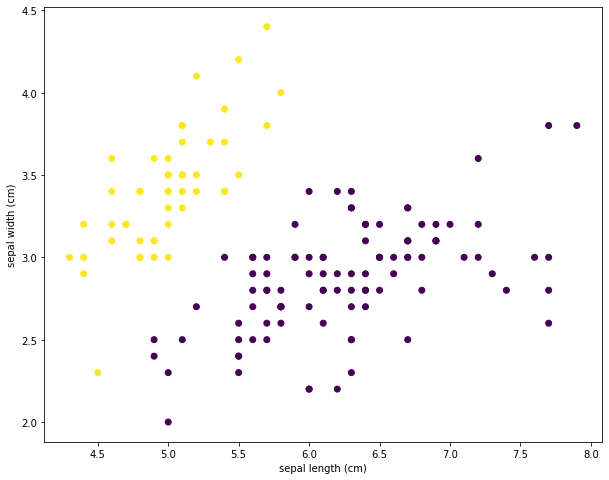

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

y = np.where(y == 0, 1, -1)

fig = plt.figure(figsize=(10,8))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Solución Iris con perceptron 

Text(0, 0.5, 'sepal width (cm)')

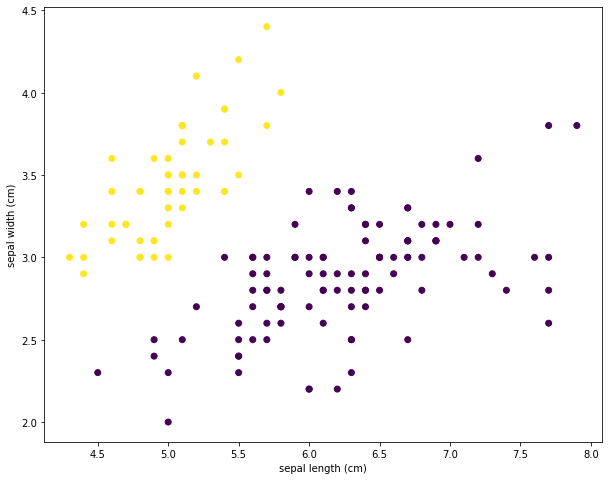

In [59]:
my_iris_classifier = my_perceptron(eta=0.01, epoch=100)

my_iris_classifier.fit(X,y)

y_pred = my_iris_classifier.predict(X)

fig = plt.figure(figsize=(10,8))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y_pred)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Solución Iris con adaline


Text(0, 0.5, 'sepal width (cm)')

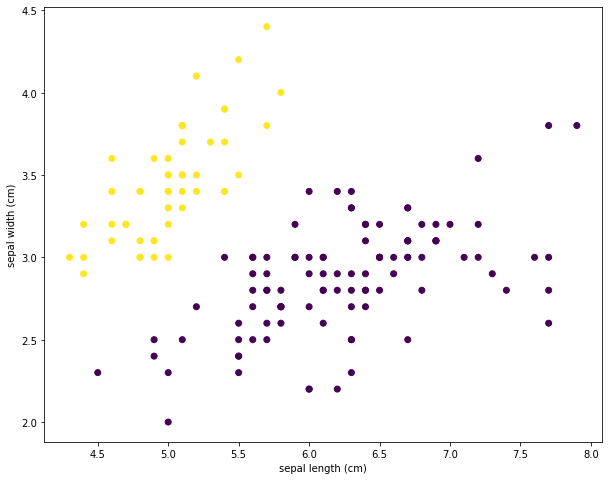

In [60]:
my_iris_classifier = my_adaline(eta=0.001, epoch=1000)

my_iris_classifier.fit(X,y)

y_pred = my_iris_classifier.predict(X)

fig = plt.figure(figsize=(10,8))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c = y_pred)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Comparación de resultados

Con adaline, el tiempo de ejecución es mas largo. 